In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import pyproj
from shapely import geometry
import matplotlib.pyplot as plt


%matplotlib inline

In [2]:
gama_df = pd.read_csv('/home/haxixe/pml_grafita/database/csv/gama_df.csv')
gama_df.head()

,index,KPERC,eU,eTH,UTHRAZAO,X,Y,MDT,THKRAZAO,CTCOR,LATITUDE,LONGITUDE
0,0,1.02,1.11,13.00,0.1,292878.15,7624109.00,600.12,9.86,23.0,-21.473638,-46.998997
1,1,1.47,1.09,13.53,0.1,292876.59,7624190.38,599.47,9.77,24.2,-21.472903,-46.999002
2,2,1.82,1.15,14.97,0.1,292875.03,7624271.94,600.63,9.81,25.3,-21.472167,-46.999007
3,3,1.52,1.22,14.94,0.1,292874.16,7624353.33,602.72,9.96,25.5,-21.471432,-46.999005
4,4,1.34,1.15,13.11,0.1,292873.81,7624434.72,602.21,10.18,24.5,-21.470697,-46.998998


In [3]:
gama_df = gama_df.drop(['index'],axis=1)
gama_df

,KPERC,eU,eTH,UTHRAZAO,X,Y,MDT,THKRAZAO,CTCOR,LATITUDE,LONGITUDE
0,1.020,1.110,13.000,0.100,292878.15,7624109.00,600.12,9.860,23.000,-21.473638,-46.998997
1,1.470,1.090,13.530,0.100,292876.59,7624190.38,599.47,9.770,24.200,-21.472903,-46.999002
2,1.820,1.150,14.970,0.100,292875.03,7624271.94,600.63,9.810,25.300,-21.472167,-46.999007
3,1.520,1.220,14.940,0.100,292874.16,7624353.33,602.72,9.960,25.500,-21.471432,-46.999005
4,1.340,1.150,13.110,0.100,292873.81,7624434.72,602.21,10.180,24.500,-21.470697,-46.998998
...,...,...,...,...,...,...,...,...,...,...,...
1169654,0.509,0.373,15.020,0.059,602874.51,7526876.45,571.23,39.739,5.532,-22.360971,-44.000843
1169655,0.315,0.549,14.462,0.061,602872.51,7526806.94,578.02,47.230,5.043,-22.361599,-44.000858
1169656,0.282,1.005,17.569,0.063,602871.22,7526737.54,581.39,58.969,6.422,-22.362226,-44.000866
1169657,0.399,1.347,20.376,0.065,602870.35,7526668.02,577.24,79.214,8.287,-22.362854,-44.000870


In [4]:
gama_df['geometry'] = [geometry.Point(x, y) for x, y in zip(gama_df['X'], gama_df['Y'])]

In [5]:
crs ="+proj=utm +zone=23 +south +ellps=WGS84 +datum=WGS84 +units=m +no_defs"
gama_df = gpd.GeoDataFrame(gama_df, geometry='geometry', crs=crs)
gama_df.head()

,KPERC,eU,eTH,UTHRAZAO,X,Y,MDT,THKRAZAO,CTCOR,LATITUDE,LONGITUDE,geometry
0,1.02,1.11,13.00,0.1,292878.15,7624109.00,600.12,9.86,23.0,-21.473638,-46.998997,POINT (292878.150 7624109.000)
1,1.47,1.09,13.53,0.1,292876.59,7624190.38,599.47,9.77,24.2,-21.472903,-46.999002,POINT (292876.590 7624190.380)
2,1.82,1.15,14.97,0.1,292875.03,7624271.94,600.63,9.81,25.3,-21.472167,-46.999007,POINT (292875.030 7624271.940)
3,1.52,1.22,14.94,0.1,292874.16,7624353.33,602.72,9.96,25.5,-21.471432,-46.999005,POINT (292874.160 7624353.330)
4,1.34,1.15,13.11,0.1,292873.81,7624434.72,602.21,10.18,24.5,-21.470697,-46.998998,POINT (292873.810 7624434.720)


In [8]:
import earthpy

pg_area_norte = gpd.read_file('../database/vectors/pg_area_NW_1105/pg_area_norte1105.shp')
pg_area_norte.crs

earthpy.epsg['32723']
pg_area_norte.bounds


,minx,miny,maxx,maxy
0,292276.074134,7.564166e+06,345032.438156,7.636970e+06


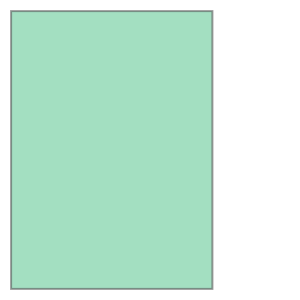

In [9]:
bounds = geometry.Polygon([(292276.074134, 7.636970e+06), (345032.438156, 7.636970e+06), 
                           (345032.438156, 7.564166e+06), (292276.074134, 7.564166e+06)])
area = bounds.area

bounds

In [10]:
cond1 = gama_df.intersects(bounds)
gama_df = gama_df[cond1]

In [11]:
gama_df.to_csv('../database/csv/gama_area_norte.csv')